# Project: Investigate a Dataset - ( TMDb movie data)

### Table of Contents:

1. Introduction
2. Data Wrangling
3. Exploratory Data Analysis
4. Conclusions

### Introduction:

Dataset Description: This data was collected from a database (TMDB) that describes about 10,000 films with a wide range of metadata such as (types of films - titles - cast - revenues ...) that facilitate understanding and analysis of the data well. Each column has information

- id/ imdb_id :Dicates the movie ID
- Popularity:The number of people who watched the movie, as here shows us the most popular and least popular movie numbers.
- Budget:The amount of money that the movie will produce and that will be spent on it. Here we can analyze the budget for each movie over the years.
- Revenue:The financial inputs that the movie gets in exchange for views, we can get the relationship between it and popularity.
- Original_title:Title of movie.
- Cast:Name of actors.
- Homepage :homepage in website.
- Director:Nameof director, we can analysis most popular director to watch his movies or his movie has high revenue.
- Tagline:describes the movie.
- keywords:Some words that describe movie.
- Overview:Summary about movie.
- Runtime: The number of hours that movie shown ,You can find out the maximum duration of time in which it is preferable to watch the movie and the least duration.
- Genres:Types of movies,You can find out the maximum tyepe which preferable to watch.
- Production_companies:The name of company which product movie , we can analysis the relationship between company production and revenue or budget.
- Release_date:The date the movie was shown.
- Vote_count :The number of votes from viewers.
- Vote_average:Average votes from viewers.
- Release_year:The year the movie was shown.

In [1]:
#set up import statements for all of the packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Data Wrangling:

1. General Properties

In [2]:
#Load your data and print out
df= pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

In [3]:
print(df.shape)

(10866, 21)


In [8]:
df.drop(['id', 'homepage','tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.head()

imdb_id  popularity     budget     revenue                original_title  \
0  tt0369610   32.985763  150000000  1513528810                Jurassic World   
1  tt1392190   28.419936  150000000   378436354            Mad Max: Fury Road   
2  tt2908446   13.112507  110000000   295238201                     Insurgent   
3  tt2488496   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  tt2820852    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres  \
0      124  Action|Adventure|Science Fiction|Thriller   
1      120  Action|Adventure|Science Fiction|Thriller   
2      119         Adventure|Science Fiction|Thriller   
3      136   Action|Adventure|Science Fiction|Fantasy   
4      137                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09

In this step we drop som columns that not important and we can not use for analysis.

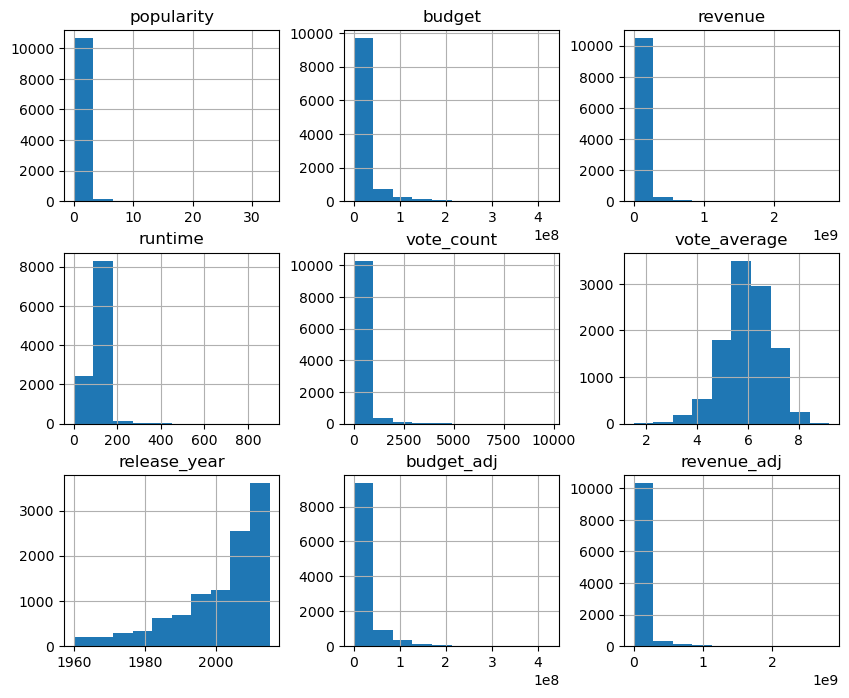

In [9]:
df.hist(figsize=(10,8));

In this step, we will plot the data of the data frame to get a preliminary understanding of the data types. We will learn about the data and type of each column to help us analyze the data easily by using seaborn pariplot() function .

2. Data Cleaning

In [10]:
df.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The cell shows there are missing values.

In [11]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9771 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               9771 non-null   object 
 1   popularity            9771 non-null   float64
 2   budget                9771 non-null   int64  
 3   revenue               9771 non-null   int64  
 4   original_title        9771 non-null   object 
 5   cast                  9771 non-null   object 
 6   director              9771 non-null   object 
 7   runtime               9771 non-null   int64  
 8   genres                9771 non-null   object 
 9   production_companies  9771 non-null   object 
 10  release_date          9771 non-null   object 
 11  vote_count            9771 non-null   int64  
 12  vote_average          9771 non-null   float64
 13  release_year          9771 non-null   int64  
 14  budget_adj            9771 non-null   float64
 15  revenue_adj         

In [12]:
df.duplicated().sum()

1

The cell shows there is one duplicated value.

In [13]:
df.drop_duplicates()

imdb_id  popularity     budget     revenue  \
0      tt0369610   32.985763  150000000  1513528810   
1      tt1392190   28.419936  150000000   378436354   
2      tt2908446   13.112507  110000000   295238201   
3      tt2488496   11.173104  200000000  2068178225   
4      tt2820852    9.335014  190000000  1506249360   
...          ...         ...        ...         ...   
10861  tt0060371    0.080598          0           0   
10862  tt0060472    0.065543          0           0   
10863  tt0060161    0.065141          0           0   
10864  tt0061177    0.064317          0           0   
10865  tt0060666    0.035919      19000           0   

                     original_title  \
0                    Jurassic World   
1                Mad Max: Fury Road   
2                         Insurgent   
3      Star Wars: The Force Awakens   
4                         Furious 7   
...                             ...   
10861            The Endless Summer   
10862                    Grand Prix   
10863           Beregis Avtomobilya   
10864        What's Up, Tiger Lily?   
10865      Manos: The Hands of Fate   

                                                    cast            director  \
0      Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...     Colin Trevorrow   
1      Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...       George Miller   
2      Shailene Woodley|Theo James|Kate Winslet|Ansel...    Robert Schwentke   
3      Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...         J.J. Abrams   
4      Vin Diesel|Paul Walker|Jason Statham|Michelle ...           James Wan   
...                                                  ...                 ...   
10861  Michael Hynson|Robert August|Lord 'Tally Ho' B...         Bruce Brown   
10862  James Garner|Eva Marie Saint|Yves Montand|Tosh...  John Frankenheimer   
10863  Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...      Eldar Ryazanov   
10864  Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...         Woody Allen   
10865  Harold P. Warren|Tom Neyman|John Reynolds|Dian...    Harold P. Warren   

       runtime                                     genres  \
0          124  Action|Adventure|Science Fiction|Thriller   
1          120  Action|Adventure|Science Fiction|Thriller   
2          119         Adventure|Science Fiction|Thriller   
3          136   Action|Adventure|Science Fiction|Fantasy   
4          137                      Action|Crime|Thriller   
...        ...                                        ...   
10861       95                                Documentary   
10862      176                     Action|Adventure|Drama   
10863       94                             Mystery|Comedy   
10864       80                              Action|Comedy   
10865       74                                     Horror   

                                    production_companies release_date  \
0      Universal Studios|Amblin Entertainment|Legenda...       6/9/15   
1      Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15   
2      Summit Entertainment|Mandeville Films|Red Wago...      3/18/15   
3              Lucasfilm|Truenorth Productions|Bad Robot     12/15/15   
4      Universal Pictures|Original Film|Media Rights ...       4/1/15   
...                                                  ...          ...   
10861                                  Bruce Brown Films      6/15/66   
10862  Cherokee Productions|Joel Productions|Douglas ...     12/21/66   
10863                                            Mosfilm       1/1/66   
10864                            Benedict Pictures Corp.      11/2/66   
10865                                          Norm-Iris     11/15/66   

       vote_count  vote_average  release_year    budget_adj   revenue_adj  
0            5562           6.5          2015  1.379999e+08  1.392446e+09  
1            6185           7.1          2015  1.379999e+08  3.481613e+08  
2            2480           6.3          2015  1.012000e+08  2.716190e+08  
3   

In this step we drop the duplicate value.

Next step: Incorrect Data Validation (Check for zero/negative values , Check the data)

In [14]:
df[df.popularity<0]['popularity']

Series([], Name: popularity, dtype: float64)

In [15]:
df[df.budget<0]['budget']

Series([], Name: budget, dtype: int64)

In [16]:
df[df.revenue<0]['revenue']

Series([], Name: revenue, dtype: int64)

In [17]:
df['original_title'].unique()

array(['Jurassic World', 'Mad Max: Fury Road', 'Insurgent', ...,
       'Beregis Avtomobilya', "What's Up, Tiger Lily?",
       'Manos: The Hands of Fate'], dtype=object)

In [18]:
df['cast'].unique()

array(["Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson",
       'Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nicholas Hoult|Josh Helman',
       'Shailene Woodley|Theo James|Kate Winslet|Ansel Elgort|Miles Teller',
       ...,
       'Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Zhzhyonov|Olga Aroseva|Lyubov Dobrzhanskaya',
       'Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|John Sebastian|Tadao Nakamaru',
       'Harold P. Warren|Tom Neyman|John Reynolds|Diane Mahree|Stephanie Nielson'],
      dtype=object)

In [19]:
df['director'].unique()

array(['Colin Trevorrow', 'George Miller', 'Robert Schwentke', ...,
       'Alan Rafkin', 'Bruce Brown', 'Harold P. Warren'], dtype=object)

In [20]:
df[df.runtime<0]['runtime']

Series([], Name: runtime, dtype: int64)

In [21]:
df['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [22]:
df['production_companies'].unique()

array(['Universal Studios|Amblin Entertainment|Legendary Pictures|Fuji Television Network|Dentsu',
       'Village Roadshow Pictures|Kennedy Miller Productions',
       'Summit Entertainment|Mandeville Films|Red Wagon Entertainment|NeoReel',
       ...,
       'Cherokee Productions|Joel Productions|Douglas & Lewis Productions',
       'Benedict Pictures Corp.', 'Norm-Iris'], dtype=object)

In [23]:
df[df.vote_count<0]['vote_count']

Series([], Name: vote_count, dtype: int64)

In [24]:
df[df.vote_average<0]['vote_average']

Series([], Name: vote_average, dtype: float64)

In [25]:
df[df.budget_adj<0]['budget_adj']

Series([], Name: budget_adj, dtype: float64)

In [26]:
df[df.revenue_adj<0]['revenue_adj']

Series([], Name: revenue_adj, dtype: float64)

In [27]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [28]:
df['release_date'].unique()

array(['6/9/15', '5/13/15', '3/18/15', ..., '12/21/66', '11/2/66',
       '11/15/66'], dtype=object)

### Exploratory Data Analysis:

#### Questions

1. What was the rate overall of popularity for genre movie?
2. Which companies production has higher revenue rate?
3. How revenue develops compared to budget over time?
4. Compare the top 10 director by most popularity?

In [29]:
df.describe()

popularity        budget       revenue      runtime   vote_count  \
count  9771.000000  9.771000e+03  9.771000e+03  9771.000000  9771.000000   
mean      0.694765  1.618439e+07  4.423583e+07   102.938491   239.339986   
std       1.036975  3.221186e+07  1.225943e+08    27.864293   603.036904   
min       0.000188  0.000000e+00  0.000000e+00     0.000000    10.000000   
25%       0.232665  0.000000e+00  0.000000e+00    90.000000    18.000000   
50%       0.419765  2.000000e+05  0.000000e+00   100.000000    46.000000   
75%       0.776436  1.945000e+07  3.105254e+07   112.000000   173.000000   
max      32.985763  4.250000e+08  2.781506e+09   877.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   9771.000000   9771.000000  9.771000e+03  9.771000e+03  
mean       5.963289   2000.877699  1.942105e+07  5.705903e+07  
std        0.913213     13.037270  3.566724e+07  1.514565e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1994.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2005.000000  3.245007e+05  0.000000e+00  
75%        6.600000   2011.000000  2.469335e+07  4.312352e+07  
max        8.700000   2015.000000  4.250000e+08  2.827124e+09

#### Q1:What was the rate overall of popularity for each genre movie?

In [30]:
df.groupby('genres')['popularity'].mean()

genres
Action                                      0.630961
Action|Adventure                            0.718727
Action|Adventure|Animation                  0.454663
Action|Adventure|Animation|Comedy|Drama     0.370019
Action|Adventure|Animation|Comedy|Family    0.063246
                                              ...   
Western|Drama|Crime|Romance                 0.393664
Western|History                             0.128234
Western|History|War                         0.948560
Western|Horror|Thriller                     0.354484
Western|Thriller                            0.387592
Name: popularity, Length: 1916, dtype: float64

The cell showe the rate of popularity for each genre movies the highest rate is Western|History|War and the lowest rate is Action|Adventure|Animation|Comedy|Family.

#### Q2: Which companies production has higher revenue rate?

In [31]:
df.groupby('production_companies')['revenue'].mean()

production_companies
10th Hole Productions|Anonymous Content|Ambush Entertainment|Maven Pictures|Foggy Bottom Pictures                       0.0
10th Hole Productions|Benaroya Pictures|Four of a Kind Productions                                                 123820.0
120dB Films|Louisiana Media Productions|Anchor Bay Films|Mimran Schur Pictures|Upload Films                             0.0
120dB Films|Pimienta|The Salt Company International|Private Island Trax|Stun Creative                                   0.0
120dB Films|Scion Films|Voodoo Production Services|Chydzik Media Group|First Wedding Productions                     1378.0
                                                                                                                     ...   
thinkfilm|Starz Entertainment|Candy Heart Productions                                                                   0.0
uFilm|Informant Media|Entertainment Motion Pictures|Umedia|uFund                                               

The cell showe the highest rate of revenuey for 10th Hole Productions|Benaroya Pictures|Four of a Kind Productions.

#### Q3:How revenue develops compared to budget over time?

In [140]:
def myHistPlot(df, revenue_adj, bins=30, figsize=[12,6]):
    df[revenue_adj].hist(bins=bins, grid=False, edgecolor='black', figsize=figsize);
    revenue_adj=revenue_adj.replace('_','')
    plt.title(f'Distribution of {revenue_adj}'.title(),fontsize=14, weight="bold")
    plt.xlabel(revenue_adj.title(), fontsize=10, weight="bold")
    plt.ylabel('frequency'.title(), fontsize=10, weight="bold")
  

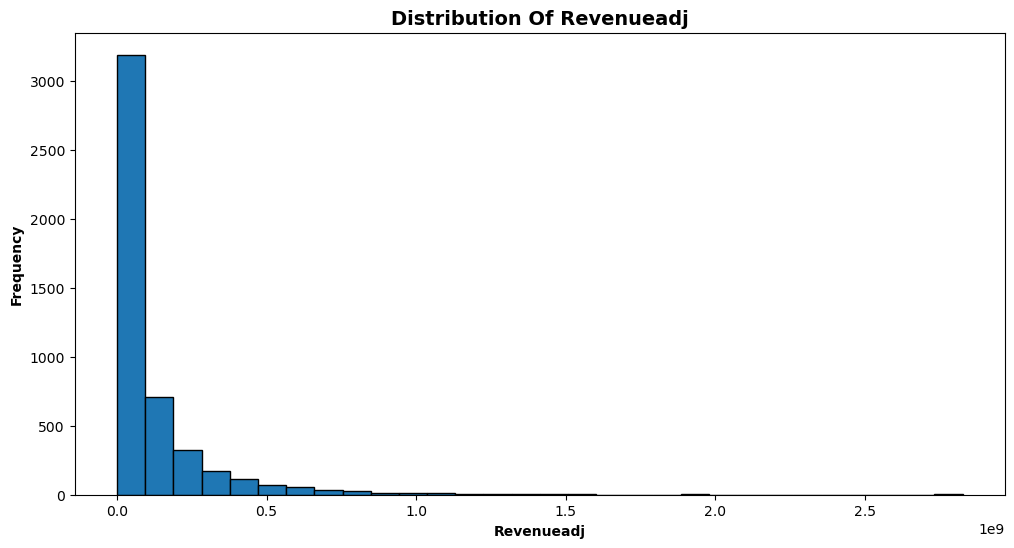

In [141]:
myHistPlot(df.query('revenue_adj>0'), 'revenue_adj')

Text(0, 0.5, 'Value($M)')

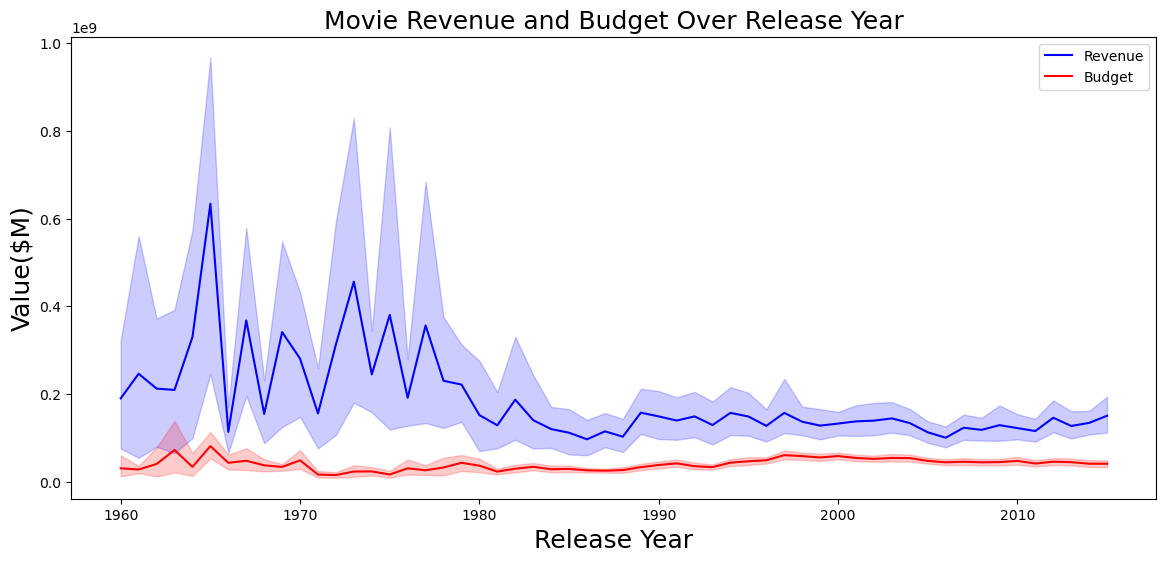

In [142]:
df_compare = df[(df['revenue'] != 0) & (df['budget'] != 0) & (df['release_year'] != 0)]
df_compare = df_compare.sort_values(by='release_year')
plt.figure(figsize=(14, 6))
sns.lineplot(x='release_year', y='revenue_adj', data=df_compare, label='Revenue', color="blue")
sns.lineplot(x='release_year', y='budget_adj', data=df_compare, label='Budget', color="red")
plt.title("Movie Revenue and Budget Over Release Year", fontsize=18)
plt.xlabel("Release Year", fontsize=18)
plt.ylabel("Value($M)", fontsize=18)

I can be concluded from the graph that the curved lines indicate whether there is a rise or decrease in revenues compared to the budget during the years of movie release. As the revenue line moves continuously and slightly compared to the budget, that is, there is an increase in revenues. As for the budget line moving lower, it may indicate a decrease in the budget.

#### Q4: Compare the top 10 director by most popularity?

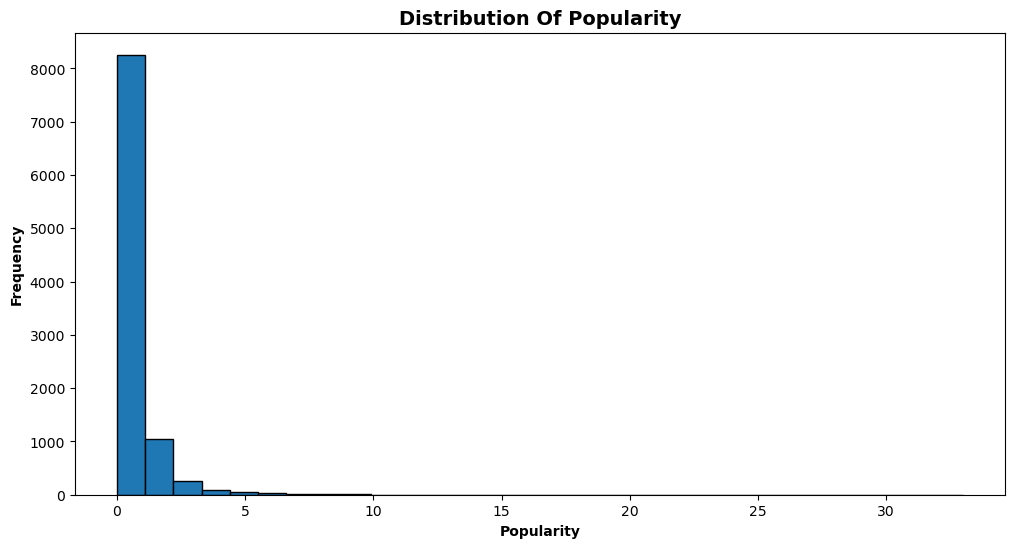

In [145]:
myHistPlot(df,'popularity')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Colin Trevorrow'),
  Text(1, 0, 'George Miller'),
  Text(2, 0, 'Robert Schwentke'),
  Text(3, 0, 'J.J. Abrams'),
  Text(4, 0, 'James Wan'),
  Text(5, 0, 'Alejandro GonzÃ¡lez IÃ±Ã¡rritu'),
  Text(6, 0, 'Alan Taylor'),
  Text(7, 0, 'Ridley Scott'),
  Text(8, 0, 'Kyle Balda|Pierre Coffin'),
  Text(9, 0, 'Pete Docter')])

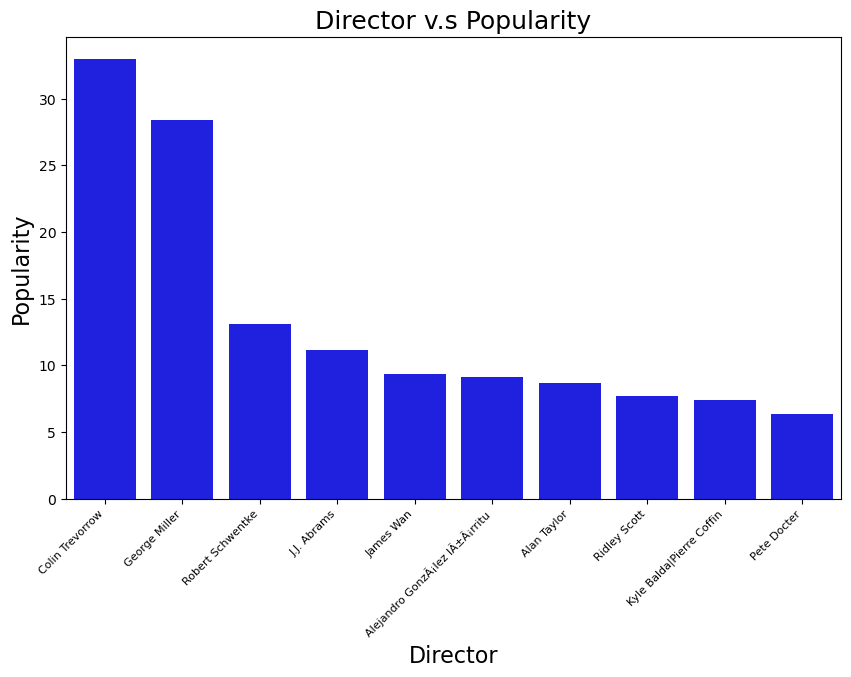

In [151]:
df_1= df[(df['popularity'] != 0) & (df['director'] != 0)]
df_1.sort_values(by='popularity')
df_2=df_1.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='director', y='popularity', data=df_2, label='popularity', color="blue")
plt.title("Director v.s Popularity", fontsize=18)
plt.xlabel("Director", fontsize=16)
plt.ylabel("Popularity", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=8)

In this question compare betweeen the top 10 director by most popularity, Colin Trevorrow has the highest popularity but Pete Docter has lowest popularity.

### Conclusions:

This data describes about 10,000 films, with some information that helps the analysis, but there are some problems that hinder the analysis. When analyzing data, you must first eliminate these problems. Some of these problems that we encountered during the analysis are the presence of missing items in some columns, and also the presence of useless columns, so they must be eliminated to facilitate the analysis process.
This analysis is a simplification of how to analyze movie base data, but there are clearer ways to analyze this data.
Some columns were used to analyze the data, such as the popularity rate of movie types, revenues, and budget. This analysis shows which companies generate more revenue than others, as well as a comparison of revenues to budget through the years of release of the film, and the top ten directors of films in terms of popularity were also analyzed.

Additional analytics can be added through the Audience Vote column, comparing average revenues or audience votes for the most and least film types.
I concluded from this analysis:
- The highest popularity rate for viewers' favorite movie genre is (Western|History|War).
- The least popular movie genre with viewers is Action|Adventure|Animation|Comedy|Family.
- The highest revenue rate for corporate productions is (10th Hole Productions|Benaroya Pictures|Four of a Kind Productions).
- The most famous director is Colin Trevorrow.
- The lesser known director is Pete Docter.

Explaining the conclusion of comparing revenues with the budget during the years of film release:
When comparing revenues and budget, the graph shows us curved lines in red, which represents the budget, while blue represents revenues. The curved lines indicate whether there was an increase or decrease in revenues/budget during the years of film release. Since the revenue line moves continuously and slightly compared to the budget, that is, there is an increase in revenues, and as we notice a noticeable increase in revenues between the years 1960 and 1970, reaching approximately 0.65. As for the budget line moving downward, this may indicate a decrease in the budget compared to revenues, but the budget line indicates similar numbers during the years of film release.

There are different ways to analyze this data that help a person understand it easier. This analysis is simplified for understanding the movie base data. It can be expanded upon in analyzing other columns to understand it easier.